In [1]:
import sys
sys.path.insert(0, r'C:\Users\buzga\Desktop\School\Reaserch\Langone\ML_RA_EHR\DataModule')
sys.path.insert(0, r'C:\Users\buzga\Desktop\School\Reaserch\Langone\ML_RA_EHR')
import matplotlib.pyplot as plt
import Data_Preparation
import evaluate 
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm
import xgboost as xgb

In [2]:
## importing data. 
path=r'C:\Users\buzga\Desktop\School\Reaserch\Langone\ML_RA_EHR\Dataset'
df = Data_Preparation.CoronnaCERTAINDataset(
    library_root=path,
    challenge="regression",
    dataset='CORRONA CERTAIN',
    process_approach='SC',
    imputation='KNN',
    patient_group='bionaive TNF',
    drug_group='all',
    time_points=(0,3),
    train_test_rate=0.8,
    save_csv=False,
    random_state=2022)

feature engineering, drop columns due to 70% missing value: Index(['smkyrs', 'numcigs', 'rfstatus_impute', 'ccpstatus_impute',
       'statin_use'],
      dtype='object')
save file to: C:\Users\buzga\Desktop\School\Reaserch\Langone\ML_RA_EHR\Dataset\.csv_temp\Train.csv
save file to: C:\Users\buzga\Desktop\School\Reaserch\Langone\ML_RA_EHR\Dataset\.csv_temp\Test.csv


In [3]:
train, train_loc = df.get_train()
test, test_loc = df.get_test()
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]
print("x_train shape is ", X_train.shape)
print("y_train shape is ", y_train.shape)
print("x_test shape is ", X_test.shape)
print("y_test shape is ", y_test.shape)

x_train shape is  (321, 54)
y_train shape is  (321,)
x_test shape is  (86, 54)
y_test shape is  (86,)


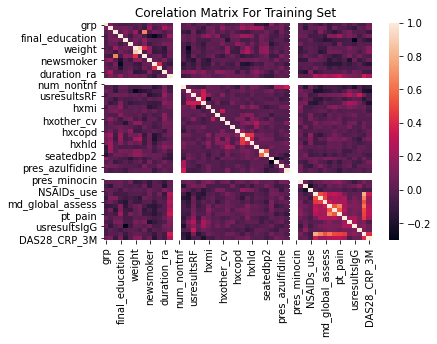

c:\Users\buzga\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\buzga\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


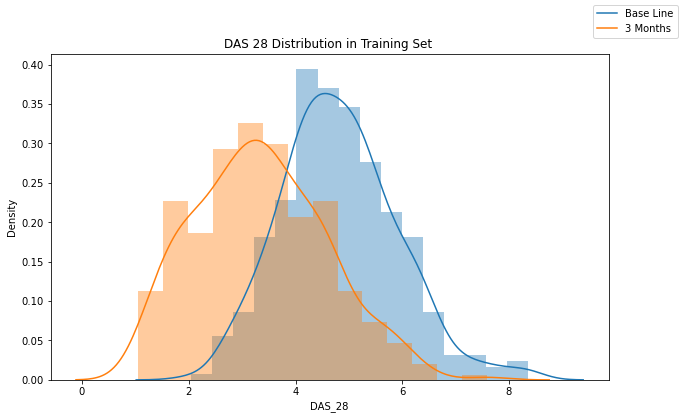

In [4]:
## explore the corelation within data. 
corelation=train.corr()
sns.heatmap(corelation)
plt.title("Corelation Matrix For Training Set ")
plt.show()


## looking at das_28 distrobution. 
fig = plt.figure(figsize=(10,6))
sns.distplot(train['DAS28_CRP_0M'])
sns.distplot(train['DAS28_CRP_3M'])
fig.legend(labels=['Base Line','3 Months'])
plt.xlabel('DAS_28')
plt.title("DAS 28 Distribution in Training Set ")
plt.show()

## OLS Regression


In [5]:
ols = linear_model.LinearRegression()
ols.fit(X_train,y_train)
ols_preds=ols.predict(X_test)


## Ridge Regresion

In [6]:
ridge_model = linear_model.RidgeCV()
ridge_model.fit(X_train,y_train)
ridge_preds=ridge_model.predict(X_test)
    

## Lasso Regression

In [7]:
Lasso_model = linear_model.Lasso()
Lasso_model.fit(X_train,y_train)
laso_preds=Lasso_model.predict(X_test)

## Elastic Net

In [8]:
Elastic_net_model = linear_model.ElasticNet()
Elastic_net_model.fit(X_train,y_train)
Elastic_net_preds=Elastic_net_model.predict(X_test)

## Random Forrest

In [9]:
Random_forrest_model=ensemble.RandomForestRegressor()
Random_forrest_model.fit(X_train,y_train)
Random_forrest_predictions=Random_forrest_model.predict(X_test)

## SVM with difrent kernels

In [10]:
svm_model=svm.SVR()
svm_model.fit(X_train,y_train)
svm_preds=svm_model.predict(X_test)

In [11]:
svm_poly_model=svm.SVR(kernel="poly")
svm_poly_model.fit(X_train,y_train)
svm_poly_preds=svm_poly_model.predict(X_test)

In [12]:
svm_sig_model=svm.SVR(kernel="sigmoid")
svm_sig_model.fit(X_train,y_train)
svm_sig_preds=svm_sig_model.predict(X_test)

## XGBoost

In [13]:
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)
xgboost_preds = xgboost.predict(X_test)

## Stacking 

In [14]:
estimators=[('lr',linear_model.RidgeCV()),('svr', svm.SVR()),("rf", ensemble.RandomForestRegressor())  ]
stracking_model = ensemble.StackingRegressor(estimators =estimators,final_estimator =linear_model.RidgeCV())    
stracking_model.fit(X_train,y_train)
stacking_model_preds=stracking_model.predict(X_test)

## accuracy

In [15]:
aml = evaluate.AutoBuild(seed=1, project_name="EHR_RA_SC")
baseline = test['DAS28_CRP_0M']
true = test['DAS28_CRP_3M']
aml.evaluate("OLS Model", baseline, true, ols_preds)
aml.evaluate("Ridge Linear Model", baseline, true, ridge_preds)
aml.evaluate("Lasso Linear Model", baseline, true, laso_preds)
aml.evaluate("Elastic Nets", baseline, true, Elastic_net_preds)
aml.evaluate("SVM RBF", baseline, true, svm_preds)
aml.evaluate("SVM POLY", baseline, true, svm_poly_preds)
aml.evaluate("SVM sigmoid", baseline, true, svm_sig_preds)
aml.evaluate("Random Forrest Regresion", baseline, true, Random_forrest_predictions)
aml.evaluate("XGBoost Regression", baseline, true, xgboost_preds)
aml.evaluate("Stacking Regression", baseline, true, stacking_model_preds)
regression, classification = aml.leaderboard()

In [16]:
regression

,model,MAE,MSE,RMSE,R2,Pearson_Correlation
0,OLS Model,1.036374,1.628608,1.276169,0.172778,0.456856
1,Ridge Linear Model,1.021219,1.565438,1.251175,0.204865,0.479908
2,Lasso Linear Model,1.073755,1.700617,1.304077,0.136203,0.387454
3,Elastic Nets,1.067166,1.670320,1.292408,0.151592,0.406077
4,SVM RBF,1.142626,1.898172,1.377742,0.035858,0.387042
5,SVM POLY,1.161493,1.947398,1.395492,0.010855,0.225482
6,SVM sigmoid,1.768137,5.486322,2.342290,-1.786676,0.100858
7,Random Forrest Regresion,0.985649,1.413186,1.188775,0.282198,0.615772
8,XGBoost Regression,1.051127,1.644979,1.282567,0.164463,0.439333
9,Stacking Regression,1.000194,1.468822,1.211950,0.253939,0.559145


In [17]:
classification

,model,Accuracy
0,OLS Model,0.453488
1,Ridge Linear Model,0.441860
2,Lasso Linear Model,0.418605
3,Elastic Nets,0.418605
4,SVM RBF,0.430233
5,SVM POLY,0.430233
6,SVM sigmoid,0.337209
7,Random Forrest Regresion,0.476744
8,XGBoost Regression,0.430233
9,Stacking Regression,0.430233
